## A mini SymPy tutorial

<a href="https://colab.research.google.com/github/uqglmn/qm/blob/main/A_mini_SymPy_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial is aimed to drill your SymPy skills. For a complete guide, please visit [SymPy homepage](https://docs.sympy.org/latest/index.html).

Let us begin by importing SymPy as sym:

In [1]:
import sympy as sym

The next code makes the outputs look better:

In [2]:
sym.init_printing(use_unicode=True)

### 1. Symbolic manipulations

Let us define a symbolic expression, representing the mathematical expression $x^2+4y$:

In [3]:
x, y = sym.symbols("x y")     # define symbols
expr = x**2 + 4*y             # define the expression
expr                          # display the expression

This beautiful expression is a result of Jupyter Notebook processing. The standard Pyhton print does not have such a feature: 

In [4]:
print(expr) # Python print

x**2 + 4*y


Let us demonstrate one more example, with trigonometric functions, $\sqrt{\sin^2(\alpha) + \cos^2(\beta)}$:

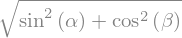

In [5]:
al, be = sym.symbols("alpha, beta") 
expr = sym.sqrt(sym.sin(al)**2 + sym.cos(be)**2)
expr

Note that ``sqrt()``, ``sin()``, and ``cos()`` above are from the SymPy library.

**Imporatant!** Everyone loves the exponential function, the Euler constant, the $\pi$, infinity, and the imaginary $i$:

In [6]:
( sym.exp(x), sym.E, sym.pi, sym.oo, sym.I )

One of the most useful features of a symbolic manipulation system is an ability to simplify mathematical expressions. SymPy has dozens of specific functions to perform various kinds of simplification.

The general function used for simplifications is called ``simplify()``. It attempts to apply all of those specific functions in an intelligent way to arrive at the simplest form of an expression. Here are three simple examples:

$$\sin^2(x) + \cos^2(x) $$

$$\dfrac{x^3+x^2-x-1}{x^2 + 2x+1}$$

$$\dfrac{\Gamma(x)}{\Gamma(x-2)}$$


In [7]:
# 1
sym.simplify( sym.sin(x)**2 + sym.cos(x)**2 )

In [8]:
# 2 
sym.simplify( (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1) )

In [9]:
# 3
sym.simplify( sym.gamma(x)/sym.gamma(x - 2) )

Here, ``gamma(x)`` is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function). We see that ``simplify()`` is capable of handling a large class of expressions.

For more examples, see [documentation](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html). 

**Important!** Note the difference between the following two statements:

In [10]:
x + 2

In [11]:
p + 2

NameError: name 'p' is not defined

The name ``x`` is defined as a symbol, so SymPy knows that ``x+2`` is an expression; but ``p`` is not defined, hence the error message.

**Exercise 1.1.** Simplify the following mathematical expressions:

$$
(x+y)^3-3 x^2 y-3 x y^2
$$

$$ 
\frac{z-1}{2}+\frac{3 z+2}{4}
$$

$$ 
3 \sin \alpha - 4 \sin^3 \alpha
$$

In [12]:
# write your solution here



In [13]:
# write your solution here



In [14]:
# write your solution here



To substitute a given value into an expression, call the ``.subs()`` method, passing a Python dictionary ``({key: value})``:

In [15]:
expr = sym.sin(x) + sym.cos(y) # define expression
expr.subs({x:1, y:2})          # evaluate at x=1 and y=2

To get a numeric value, call the ``.n()`` method:

In [16]:
expr.subs({x:1, y:2}).n()

**Exercise 1.2.** Evaluate the following mathematical expressions:

$$
x \log(3y) \;\text{ at }\; x=2,\; y=5 
$$

$$
e^{-z^2} \;\text{ at }\; z=10
$$

$$
e^{i n \pi/2} \;\text{ at }\; n=3
$$

In [17]:
# write your solution here



In [18]:
# write your solution here



In [19]:
# write your solution here



### 2. Solving equations

The function ``solve()`` is probably the most powerful tool of SymPy. It can basically solve any equation.
The function takes two arguments: ``solve(expr, var)``. This solves the equation ``expr==0`` for the variable ``var``. 

You can rewrite any equation to the form ``expr==0``, by moving all term to one side of the equation; the solutions to $A(x) = B(x)$ are the same as the solutions to $A(x) - B(x) = 0$.

For example, let us solve the quadratic equation $x^2 + 2 x - 8 = 0$:

In [20]:
sym.solve(x**2 + 2*x - 8, x)

**Exercise 2.1.** Solve the depressed cubic equation $x^3 - 6x + 4 = 0$: 

In [21]:
# write your solution here



To solve a system of equations, you can feed solve with a list of equations and a list of unknowns it should solve those equations for: 

- ```solve([equation_1, equation_2, ...], [x, y, ...])```

For example, let us solve the following system of linear equations:

$$
\begin{cases}
x + y = 3 \\
3x - 2y = 0
\end{cases}
$$

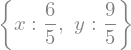

In [22]:
sym.solve( [x+y-3, 3*x-2*y], [x,y] )

**Exercise 2.2.** Solve the following system of linear equations:

$$
\begin{cases}
x + y - z = 2 \\
2x - 2y = 0 \\
4x - 3z = -1
\end{cases}
$$

In [23]:
# write your solution here



The best part of solve is, that it also works with symbolic expressions. For example let us look for the solution of $ax^2 + bx + c=0$:

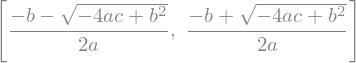

In [24]:
a, b, c = sym.symbols("a b c")
sym.solve(a*x**2 + b*x + c, x)

**Exercise 2.3.** Find solutions to the depressed cubic equation $a z^3 + b z + c = 0$. Then evaluate these solution at chosen values of parameters $a$, $b$, and $c$.

In [25]:
# write your solution here - find all three roots



### 3. Limits

With limits we can describe, with mathematical precision, infinitely large quantities, infinitely small quantities, and procedures with infinitely many steps.

For example the number $e$ is defined as the limit 

$$
e := \lim_{n\to \infty} \left( 1 + \frac1n\right)^n = 2.71828182845905...
$$

Let see how fast the expression inside the limit approaches the limit:

In [26]:
for n in [10,100,1000,10000]:
    print(f"n=%5d, (1+1/n)**n=%.9f" % (n, (1+1/n)**n))

n=   10, (1+1/n)**n=2.593742460
n=  100, (1+1/n)**n=2.704813829
n= 1000, (1+1/n)**n=2.716923932
n=10000, (1+1/n)**n=2.718145927


The limit is:

In [27]:
n = sym.symbols("n")
sym.limit( (1+1/n)**n, n, sym.oo ) # oo denotes infinity in SymPy, 

The SymPy symbol for $e$ is ``E``. It's numerical value is:

In [28]:
sym.E.n()

**Exercise 3.1.** Compute the following limits:

$$
\lim_{x \to 0}\frac{\sin(x)}{x}
$$

$$
\lim_{x \to 0}\frac{(1+x)^5 - (1+5x)}{x^2 + x^5}
$$

$$
\lim_{n \to \infty} n \tan\left( \frac{2 \pi}{2 n} \right)
$$

P.S. Try evaluating the expressions first!

In [29]:
# evaluate this

(sym.sin(x)/x).subs({x:0})

In [30]:
# write your solution here



In [31]:
# evaluate this

(((1+x)**5 - (1+5*x))/(x**2 + x**5)).subs({x:0})

In [32]:
# write your solution here



In [33]:
# evaluate this

(n*sym.tan(2*sym.pi/(2*n))).subs({n:sym.oo})

In [34]:
# write your solution here



### 4. Derivatives

To take derivatives, use the ``diff()`` function. For example, the derivative of $x^4 - x + 4$ with respect to $x$ is:

In [35]:
sym.diff(x**4 - x + 4, x)

To take the second order derivative, simply write:

In [36]:
sym.diff(x**4 - x + 4, x, x)

Partial derivatives are taken in a similar way. For example:

$$
\frac{\partial^2}{\partial x \partial y} ( x^2 y + 3 x \sin(y))
$$

In [37]:
sym.diff( x**2*y + 3*x*sym.sin(y), x, y)

**Exercise 4.1.** Compute the following derivatives:

$$
\frac{d}{dx} (x^x)
$$

$$
\frac{d^4}{dx^4} (e^{2x} + x^3 + \cos(x)) 
$$

$$
\frac{\partial^2}{\partial x \partial y} \log(x-y)
$$

P.S. Try computing these derivatives by hand first!

In [38]:
# write your solution here



In [39]:
# write your solution here



In [40]:
# write your solution here



### 5. Integrals

To compute an integral, use the ``integrate()`` function. There are two kinds of integrals, definite and indefinite. 

To compute an indefinite integral, that is, an antiderivative, or primitive, use ``integrate(expression, integration_variable)``. For example, to compute

$$
\int \cos(x)\, dx 
$$

you need to write:

In [41]:
sym.integrate(sym.cos(x), x)

Note that SymPy does not include the constant of integration. If you want it, you can add one yourself.

To compute a definite integral, use ``integrate(expression, (integration_variable, lower_limit, upper_limit))``. For example, to compute

$$
\int_0^\infty e^{-x} dx
$$

you need to write:

In [42]:
sym.integrate(sym.exp(-x), (x, 0, sym.oo))

Easy peasy!

**Exercise 5.1.** Compute the following integrals:

$$
\int (3x^2 - 4) \, dx
$$

$$
\int x^{-1} dx
$$

$$
\int \log(x) dx
$$

$$
\int_0^{\pi} \sin^2(x)\, dx
$$

P.S. Try computing these integrals by hand first! <br>
P.P.S. Use ``sym.pi`` for $\pi$.

In [43]:
# write your solution here



In [44]:
# write your solution here



In [45]:
# write your solution here



In [46]:
# write your solution here



You can pass multiple limit tuples to perform a multiple integral. For example, to compute

$$
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-x^2 - y^2} dx\,dy
$$

you need to write:

In [47]:
sym.integrate( sym.exp(-x**2 - y**2), (x, -sym.oo, sym.oo), (y, -sym.oo, sym.oo))

**Exercise 5.2.** Compute the mass of a $1\times1\times1$ box filled with material of density $\rho(x,y,z) = z^2-xy+1$, that is, compute the triple integral

$$
\iiint_0^1 \rho(x,y,z)\,dx\,dy\,dz
$$

In [48]:
# write your solution here



Let $a$ be an arbitrary constant. To compute the following integral

$$
\int_0^\infty e^{-ax} dx
$$

write:

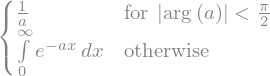

In [10]:
a = sym.symbols("a") 
sym.integrate(sym.exp(-a*x), (x, 0, sym.oo))

Suppose $a$ is a positive real contstant, that is, $a>0$. Then:

In [11]:
a = sym.symbols("a", positive=True) 
sym.integrate(sym.exp(-a*x), (x, 0, sym.oo))

### 6. Series expansion

SymPy can compute asymptotic series expansions of functions around a point. To compute the expansion of $f(x)$ around the point $x=x_0$ terms of order $x^n$, use ``f(x).series(x, x0, n+1)``. For example, to compute the series of $\exp(\sin(x))$ at $x=0$ to the 4-th order, 

$$
e^{\sin(x)} = 1+x+\frac{x^2}{2}-\frac{x^4}{8} + \mathcal{O}(x^5)
$$

you need to write:

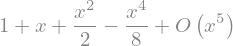

In [49]:
expr = sym.exp(sym.sin(x))
expr.series(x, 0, 5)

**Exercise 6.1.** Compute expansions of the following functions at $x=x_0$ to the given order:

$$
\log(x) , \; x_0 = 1, \; n =5
$$

$$
\frac{1}{1+x} , \; x_0 = 0, \; n =10
$$

$$
\sqrt{1-x} , \; x_0 = 0, \; n =3
$$

In [50]:
# write your solution here



In [51]:
# write your solution here



In [52]:
# write your solution here



### 7. Differential equations

To solve differential equations, use ``dsolve()``. First, you need to create an undefined function by passing ``cls=Function`` to the ``symbols`` function:

In [53]:
f, g = sym.symbols('f g', cls=sym.Function)

``f`` and ``g`` are now undefined functions. We can call ``f(x)``, and it will represent an unknown function:

In [54]:
f(x)

Derivatives of ``f(x)`` are unevaluated:

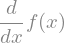

In [55]:
f(x).diff(x)

To solve an ODE, we need to pass it and the unknown function to ``dsolve()``, that is:

- ``dsolve(differential_equation, unknown_function)``

For example, to solve the differential equation $f''(x) - 2 f'(x)+ f(x) = \sin(x)$, write:

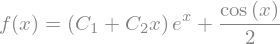

In [56]:
sym.dsolve(f(x).diff(x, x) - 2*f(x).diff(x) + f(x) - sym.sin(x), f(x))

Here ``C1`` and ``C2`` are arbitrary constants.

**Exercise 7.1.** Solve the following differential equations:

$$
f''(x) = f(x)
$$

$$
f''(x) + 3 f'(x) - 4 f(x) = e^{5x}
$$

$$
x^2 f''(x) + x f'(x) + f(x) = x^4 - 3
$$

$$
f''(x) + (x-1) f'(x) - 2 f(x) = 0
$$

In [57]:
# write your solution here



In [58]:
# write your solution here



In [59]:
# write your solution here



In [60]:
# write your solution here



### 8. Vectors and matrices

To make a matrix in SymPy, use the ``Matrix`` object. A matrix is constructed by providing a list of row vectors that make up the matrix. For example, to construct the matrix

$$
\begin{bmatrix}
1 & -1 \\
3 & 4 \\
0 & 2
\end{bmatrix}
$$

use

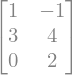

In [61]:
sym.Matrix([[1, -1], [3, 4], [0, 2]])

To make it easy to make column vectors, a list of elements is considered to be a column vector.

In [62]:
sym.Matrix([1, 2, 3])

Matrices are manipulated just like any other object in SymPy or Python.

In [63]:
M = sym.Matrix([[1, 2, 3], [3, 2, 1]])
N = sym.Matrix([0, 1, 1])
M*N

Transposition:

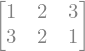

In [64]:
M

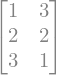

In [65]:
M.T

Determinant:

In [66]:
A = sym.Matrix([[1, 2, 3], [3, 2, 1], [5,7,6]])
A.det()

#### 8.1. Linear independence

To test if a list of vectors is linearly independent, combine vectors in to a matrix and use ``.rref()`` method, which gives the reduced row echelon form:

In [67]:
# define three vectors
v1 = [1,2,3]
v2 = [4,5,6]
v3 = [2,1,0]

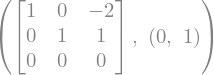

In [68]:
# combine vectors into a matrix: each vectors is a column of the resulting matrix 
A = sym.Matrix([v1,v2,v3]).T
A.rref()

Since the result is of the form

$
\begin{pmatrix}
I & X \\ 0 & 0
\end{pmatrix}
$

where $I$ is an identity matrix and $X$ is any non-zero matrix, vectors ``v1``, ``v2``, and ``v3`` are linearly dependent.

Let's consider one more example:

In [69]:
# define three vectors
v1 = [1,2,3]
v2 = [2,5,6]
v3 = [2,1,0]

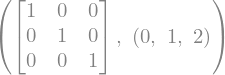

In [70]:
# combine vectors into a matrix: each vectors is a column of the resulting matrix 
A = sym.Matrix([v1,v2,v3]).T
A.rref()

This time vectors ``v1``, ``v2``, and ``v3`` are linearly independent.

**Exercise 8.1.** Verify is these vectors are linearly independent:

$$
v_1 = (1,-1,0,0), \quad\;
v_2 = (0,1,-1,0), \quad\;
v_3 = (0,0,1,-1), \quad\;
v_4 = (1,0,0,1)
$$

In [71]:
# write your solution here



#### 8.2. Kernel and image

Let $M$ be an $m \times n$ matrix with real (or complex) entries. We can view such a matrix as a linear operator from $\mathbb{R}^n$ to $\mathbb{R}^m$:

$$
M \;:\; \mathbb{R}^n \to \mathbb{R}^m
$$

The kernel of $M$ is the set of vectors in the domain $\mathbb{R}^n$ that are mapped to the vector of zeros (the null vector) in the codomain $\mathbb{R}^m$:
$$
{\rm ker} M = \left\{ v \in \mathbb{R}^n :\; M v = \begin{pmatrix} 0\\\vdots\\ 0\end{pmatrix}  \right\}
$$

The image of $M$ is the set of vectors in the codomain $\mathbb{R}^m$ that are the result of $M$ acting on all vectors in the domain $\mathbb{R}^n$:

$$
{\rm im} M = \left\{ u \in \mathbb{R}^m :\; u = M v \;\text{ for some }\; v \in \mathbb{R}^n  \right\}
$$


For example, suppose that

$$
M = \begin{pmatrix} 1 & 2 & 3 & 0 & 0 \\ 0 & 1 & 2 & 3 & 0 \\ 0 & 0 & 1 & 2 & 3 \end{pmatrix}
$$

To find a basis of the kernel of $M$ use ``.nulspace()`` method:

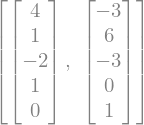

In [72]:
M = sym.Matrix([[1, 2, 3, 0, 0], [0, 1, 2, 3, 0], [0, 0, 1, 2, 3]])
M.nullspace()

To find a basis of the image of $M$ use ``.columnspace()`` method:

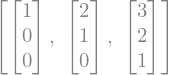

In [73]:
M.columnspace()

**Exercise 8.2.** Find bases of the kernel and image of 

$$
M = \begin{pmatrix} 1 & 0 & 3 & 0 \\ 0 & 2 & 0 & 4 \\ 1 & 0 & 3 & 0 \end{pmatrix}
$$


In [74]:
# write your solution here



#### 8.3. Eigenvalues and eigenvectors

Let $M$ be an $n \times n$ matrix with complex entries. A scalar $\lambda \in \mathbb{C}$ is called an eigenvalue of $M$ if there exists a non-null vector $v \in \mathbb{C}^n$ such that

$$
M v = \lambda v
$$

Such a vector $v$ is called and eigenvector of $M$ corresponding to the eigenvalue $\lambda$.

For example, suppose that

$$
M = \begin{pmatrix} 3& -2&  4& -2 \\ 5&  3& -3& -2 \\ 5& -2&  2& -2  \\ 5& -2& -3&  3 \end{pmatrix}
$$

To find eigenvalues of $M$, use ``.eigenvals()`` method. It returns a dictionary of eigenvalues and their [algebraic multiplicities](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Algebraic_multiplicity).

In [75]:
M = sym.Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
M.eigenvals()

To find the eigenvectors, use ``.eigenvects()`` method. It returns a list of tuples of the form:

- ``(eigenvalue, algebraic_multiplicity, [eigenvectors])``

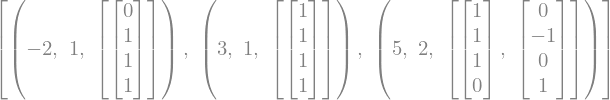

In [76]:
M.eigenvects()

**Exercise 8.3.** Find eigenvalues and corresponding eigenvectors of the following matrix:

$$
M = \begin{pmatrix} 1 & 0 & 3 \\ 0 & 2 & 0 \\ 3 & 0 & 1 \end{pmatrix}
$$

In [ ]:
# write your solution here



#### 8.4. Matrix diagonalisation

To diagonalize a matrix $M$ is to find an invertible matrix $P$ and a diagonal matrix $D$ such that $M=PDP^{-1}$. This is done as follows:

In [77]:
M = sym.Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
P, D = M.diagonalize()

where

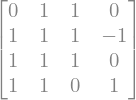

In [78]:
P

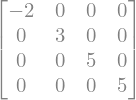

In [79]:
D

Matrix $D$ a diagonal matrix of eigenvalues of $M$ and the matrix $P$ is an a matrix of eigenvectors of $M$ (stacked vertically).

Let us verify that $D = P^{-1} M P$:

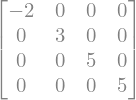

In [80]:
P.inv() * M * P

Here ``.inv()`` computes the inverse of $P$:

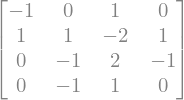

In [81]:
P.inv()

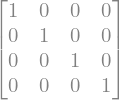

In [82]:
P.inv() * P

**Important!** Not all matrices are diagonalisable. You can check if a matrix is diagonalizable by calling its ``.is_diagonalizable()`` method:

In [83]:
M.is_diagonalizable()

True

**Exercise 8.4.** Diagonalise the following matrix:

$$
M = 
\begin{bmatrix} 
0 & 2 & -1 \\
2 & 0 & -1 \\
-1 & -1 & 2
\end{bmatrix}
$$

In [84]:
# write your solution here



---